In [1]:
#Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#Carregar os Dados

data_path = './waterquality/waterQuality1.csv' 
df = pd.read_csv(data_path, delimiter=',')

display(df)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


Erro Médio Quadrático (MSE): 0.0007255135110225203


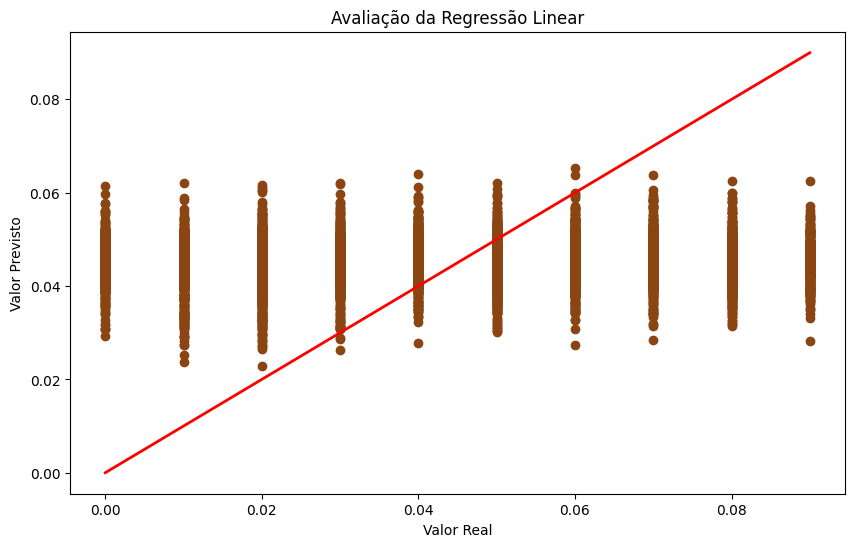

In [3]:
#substitua #NUM! por NaN
df.replace('#NUM!', np.nan, inplace=True)

# Separe as variáveis independentes (X) e a variável alvo (y)
x = df.drop("uranium", axis=1)
y = df["uranium"]

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

# Crie um imputador para preencher valores ausentes com a média
imputer = SimpleImputer(strategy='mean')

# Ajuste o imputador aos dados de treinamento e transforme os dados
X_train = imputer.fit_transform(X_train)

# Transforme também os dados de teste usando o mesmo imputador
X_test = imputer.transform(X_test)

# Crie um modelo de regressão linear
model = LinearRegression()

# Treine o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Faça previsões com o modelo nos dados de teste
y_pred = model.predict(X_test)

# Calcule o Erro Médio Quadrático (MSE) para avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Médio Quadrático (MSE): {mse}")

# Crie um gráfico de dispersão para visualizar as previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='saddlebrown')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Avaliação da Regressão Linear')
plt.show()
